<a href="https://colab.research.google.com/github/prit-tech/Computer-Vision/blob/master/Face_recognition_Project_Pritam_Choudhary_AIML_Online.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

<b>Project Description:</b>In this hands-on project, the goal is to build a face identification model to recognize faces. 

<b>Data Description:</b> Aligned Face Dataset from Pinterest. This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and aligned using dlib library.

<b>Objective:</b> In this problem, we use a pre-trained model trained on Face recognition to recognize similar faces. Here, we are particularly interested in recognizing whether two given faces are of the same person or not. 

<b>Steps and Tasks:</b>
- Load the dataset and create the metadata.
- Check some samples of metadata.
- Load the pre-trained model and weights.
- Generate Embedding vectors for each face in the dataset.
- Build distance metrics for identifying the distance between two given
images.
- Use PCA for dimensionality reduction.
- Build SVM classifier to map each image to its right person.
- Predict using the SVM model.

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow
tensorflow.__version__

'2.2.0-rc1'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Change current working directory to project folder (1 mark)

In [0]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Deep Learning/')
path = '.'

In [0]:
pwd

'/content/drive/My Drive/Colab Notebooks/Deep Learning'

In [0]:
project_path = "/content/drive/My Drive/Colab Notebooks/Deep Learning"

### Extract the zip file (5 Marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [0]:
from zipfile import ZipFile

In [0]:
# with ZipFile(project_path+'/Aligned Face Dataset from Pinterest.zip', 'r') as z:
#   z.extractall()

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [0]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        #print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

In [0]:
metadata

array([PINS/pins_Aaron Paul/Aaron Paul0_262.jpg,
       PINS/pins_Aaron Paul/Aaron Paul101_247.jpg,
       PINS/pins_Aaron Paul/Aaron Paul101_248.jpg, ...,
       PINS/pins_zendaya/zendaya97.jpg, PINS/pins_zendaya/zendaya98.jpg,
       PINS/pins_zendaya/zendaya99.jpg], dtype=object)

In [0]:
metadata[1]

PINS/pins_Aaron Paul/Aaron Paul101_247.jpg

### Define function to load image
- Define a function to load image from the metadata

In [0]:
import cv2
def load_image(path):
    #print(path)
    img = cv2.imread(path, 1)
    #print(img)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (5 Marks)
- Load one image using the function "load_image"

In [0]:
from google.colab.patches import cv2_imshow

In [0]:
pathimg = str(metadata[226])

In [0]:
oneImg  = load_image(pathimg)

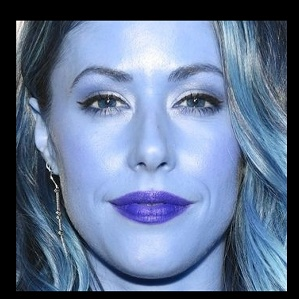

In [0]:
cv2_imshow(oneImg)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (5 Marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [0]:
# Loading Model weights
model = vgg_face()
# Loading Model weights
WEIGHTS_FILE = "vgg_face_weights.h5"
model.load_weights(WEIGHTS_FILE)

### Get vgg_face_descriptor

In [0]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [0]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
print(img_path)
img = load_image(img_path)
# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)
img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 
#print(vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0])
embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(type(embedding_vector))
print(embedding_vector.shape)

PINS/pins_Aaron Paul/Aaron Paul0_262.jpg
(224, 224, 3)
<class 'numpy.ndarray'>
(2622,)


In [0]:
embedding_vector

array([ 0.03170307, -0.0150513 , -0.01243402, ...,  0.00043141,
        0.00219081, -0.00908097], dtype=float32)

### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [0]:
embeddings = np.zeros((metadata.shape[0], 2622))
import time
start_time = time.time()
for i, m in enumerate(metadata):
  print('Iteration == ', i)
  print('m value == ', m)
  img_path = m.image_path()
  img = load_image(img_path)
  # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
  img = (img / 255.).astype(np.float32)
  img = cv2.resize(img, dsize = (224, 224))
  embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]

computational_time = time.time() - start_time
print('Done in %0.3fs' %(computational_time))

embeddings[0]

Streaming output truncated to the last 5000 lines.
Iteration ==  8271
m value ==  PINS/pins_elizabeth olsen face/elizabeth olsen face154.jpg
Iteration ==  8272
m value ==  PINS/pins_elizabeth olsen face/elizabeth olsen face155.jpg
Iteration ==  8273
m value ==  PINS/pins_elizabeth olsen face/elizabeth olsen face156.jpg
Iteration ==  8274
m value ==  PINS/pins_elizabeth olsen face/elizabeth olsen face157.jpg
Iteration ==  8275
m value ==  PINS/pins_elizabeth olsen face/elizabeth olsen face158.jpg
Iteration ==  8276
m value ==  PINS/pins_elizabeth olsen face/elizabeth olsen face159.jpg
Iteration ==  8277
m value ==  PINS/pins_elizabeth olsen face/elizabeth olsen face16.jpg
Iteration ==  8278
m value ==  PINS/pins_elizabeth olsen face/elizabeth olsen face160.jpg
Iteration ==  8279
m value ==  PINS/pins_elizabeth olsen face/elizabeth olsen face161.jpg
Iteration ==  8280
m value ==  PINS/pins_elizabeth olsen face/elizabeth olsen face162.jpg
Iteration ==  8281
m value ==  PINS/pins_elizabeth

array([ 0.03170307, -0.0150513 , -0.01243402, ...,  0.00043141,
        0.00219081, -0.00908097])

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

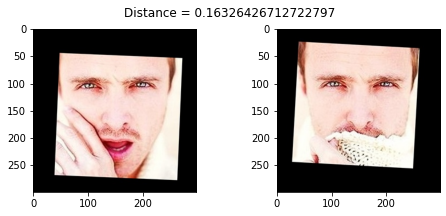

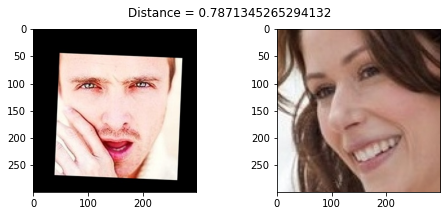

In [0]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2])}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 288)

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [0]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

In [0]:
np.sum(train_idx)

9573

In [0]:
np.sum(test_idx)

1197

In [0]:
X_train = embeddings[train_idx]
X_test = embeddings[test_idx]

In [0]:
X_train.shape

(9573, 2622)

In [0]:
X_test.shape

(1197, 2622)

### Encode the Labels (5 marks)
- Encode the targets
- Use LabelEncoder

In [0]:
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder

In [0]:
targets = np.array([m.name for m in metadata])

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(targets) 

In [0]:
y_train = y[train_idx]
y_test  = y[test_idx]

In [0]:
np.unique(targets)

array(['pins_Aaron Paul', 'pins_Alvaro Morte', 'pins_Amanda Crew',
       'pins_Amaury Nolasco', 'pins_Anna Gunn',
       'pins_Benedict Cumberbatch', 'pins_Betsy Brandt',
       'pins_Brenton Thwaites', 'pins_Brit Marling',
       'pins_Bryan Cranston', 'pins_Caity Lotz', 'pins_Cameron Monaghan',
       'pins_Chance Perdomo', 'pins_Chris Evans', 'pins_Chris Pratt',
       'pins_Cobie Smulders', 'pins_Danielle Panabaker',
       'pins_Dave Franco', 'pins_Dominic Purcell', 'pins_Dwayne Johnson',
       'pins_Emilia Clarke', 'pins_Emily Bett Rickards',
       'pins_Emma Stone', 'pins_Gwyneth Paltrow', 'pins_Henry Cavil',
       'pins_Jason Momoa', 'pins_Jeremy Renner', 'pins_Jesse Eisenberg',
       'pins_Jim Parsons', 'pins_Jon Bernthal', 'pins_Josh Radnor',
       'pins_Kit Harington', 'pins_Krysten Ritter',
       'pins_Kumail Nanjiani', 'pins_Maisie Williams',
       'pins_Mark Ruffalo', 'pins_Martin Starr', 'pins_Melissa benoit',
       'pins_Mike Colter', 'pins_Morena Baccarin', 'p

In [0]:
np.unique(y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [0]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

### Standardize the feature values (5 marks)
- Scale the features using StandardScaler

In [0]:
# Standarize features
from sklearn.preprocessing import StandardScaler

#### Add your code here ####
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

print(X_train)
print(X_train_scaled)

[[ 0.03497704 -0.00105059 -0.01248933 ... -0.01053091  0.0017932
   0.02439154]
 [ 0.02801892 -0.00112629 -0.01265749 ... -0.00904748 -0.00578399
   0.02125829]
 [ 0.01505304 -0.00503206 -0.00155372 ... -0.00577053 -0.00593261
   0.01585887]
 ...
 [ 0.00965871  0.00372159 -0.01345864 ... -0.01433404  0.01899943
   0.03899154]
 [ 0.00230931  0.00094764 -0.00544815 ... -0.01600495  0.01053974
   0.03683253]
 [ 0.01772299  0.01064049  0.01995195 ... -0.02618429  0.03288926
   0.04882648]]
[[ 2.53490013 -0.06106067 -1.45556234 ...  0.36859221 -0.39040288
   0.83822764]
 [ 1.80582692 -0.06748042 -1.47152775 ...  0.50822591 -1.1053933
   0.59758006]
 [ 0.44726122 -0.39873819 -0.41732587 ...  0.81668034 -1.11941735
   0.18288098]
 ...
 [-0.11795696  0.34367944 -1.54758958 ...  0.01060864  1.23319283
   1.9595713 ]
 [-0.88802708  0.10841413 -0.78706633 ... -0.14667176  0.43492903
   1.79374958]
 [ 0.72701915  0.93048801  1.62444322 ... -1.10483927  2.54384986
   2.71493714]]


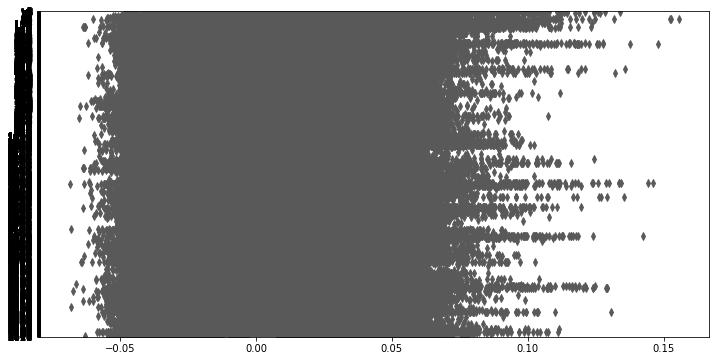

In [0]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.boxplot(data=X_train, orient="h", palette="Set2", dodge=False)

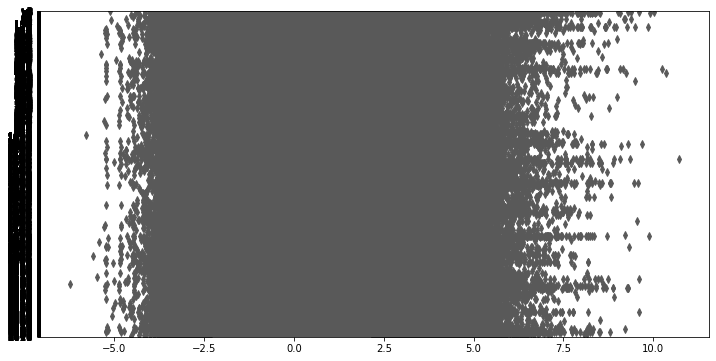

In [0]:
plt.figure(figsize=(12,6))
sns.boxplot(data=X_train_scaled, orient="h", palette="Set2", dodge=False)

### Reduce dimensions using PCA (5 Marks)
- Reduce feature dimensions using Principal Component Analysis

In [0]:
from sklearn.decomposition import PCA

In [0]:
covMatrix = np.cov(X_train_scaled,rowvar=False)
print(covMatrix)

[[ 1.00010447  0.12209438  0.10943082 ...  0.07828397 -0.11821722
  -0.25862536]
 [ 0.12209438  1.00010447  0.23570263 ... -0.04199468  0.28210931
   0.21652593]
 [ 0.10943082  0.23570263  1.00010447 ... -0.1097791   0.07300247
   0.03848684]
 ...
 [ 0.07828397 -0.04199468 -0.1097791  ...  1.00010447 -0.02320233
  -0.09532257]
 [-0.11821722  0.28210931  0.07300247 ... -0.02320233  1.00010447
   0.39700603]
 [-0.25862536  0.21652593  0.03848684 ... -0.09532257  0.39700603
   1.00010447]]


In [0]:
eig_vals, eig_vecs = np.linalg.eig(covMatrix)
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [0]:
features = 2622

In [0]:
# Taking the attribute count 2622 except the target column.
pca = PCA(n_components=features)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2622, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
print("Eigen Values :")
print("====================")
print(pca.explained_variance_)

Eigen Values :
[4.63761464e-02 1.44009813e-02 1.21886534e-02 ... 2.11592729e-11
 2.06918278e-11 2.04123578e-11]


In [0]:
print("Eigen Vectors :")
print("====================")
print(pca.components_)

Eigen Vectors :
[[-0.02056056  0.00843893 -0.00299727 ... -0.007622    0.01963185
   0.04435812]
 [ 0.01373083 -0.00742862  0.00236826 ... -0.02173612 -0.01222233
   0.00892474]
 [-0.00023909 -0.01314397 -0.02747896 ...  0.00416012 -0.01883124
  -0.03651939]
 ...
 [ 0.00048098  0.00043726  0.00055908 ...  0.00054237  0.00021949
   0.00059272]
 [-0.00193729 -0.00224033 -0.00193839 ... -0.00191922 -0.00185864
  -0.00190075]
 [ 0.00399208  0.0040171   0.00433103 ...  0.00364012  0.00404681
   0.00391847]]


In [0]:
print("The percentage of variation explained by each eigen Vector : ")
print("============================================================")
print(pca.explained_variance_ratio_)

The percentage of variation explained by each eigen Vector : 
[1.50169706e-01 4.66315401e-02 3.94678437e-02 ... 6.85154337e-11
 6.70018087e-11 6.60968624e-11]


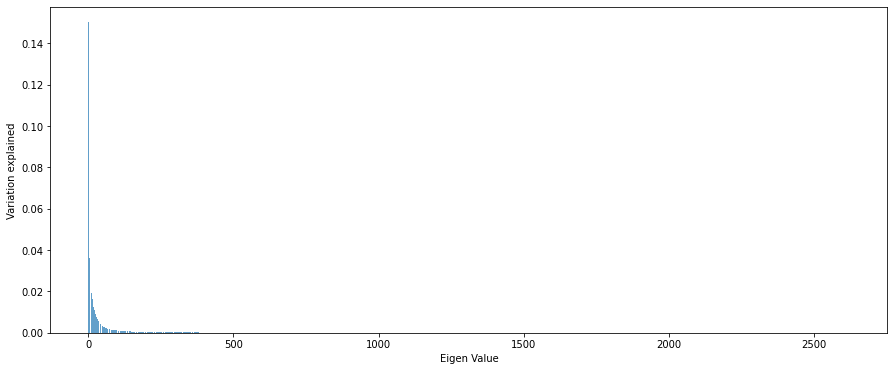

In [0]:
fig1 = plt.figure(figsize=(15,6))
plt.bar(list(range(1,(features+1))),pca.explained_variance_ratio_,alpha=0.7)
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.show()

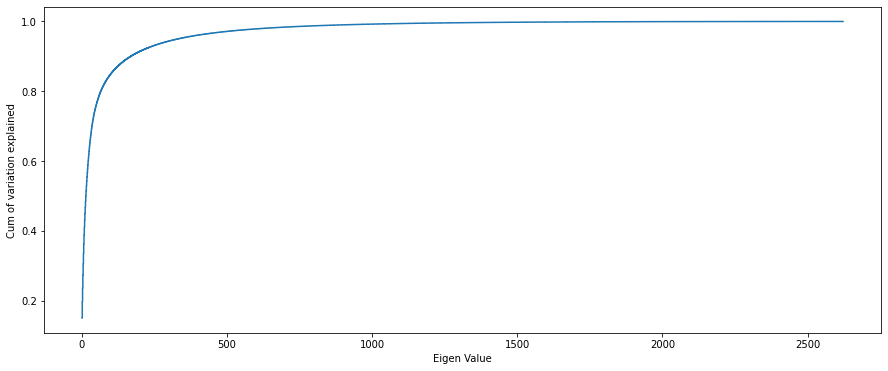

In [0]:
fig1 = plt.figure(figsize=(15,6))
plt.step(list(range(1,(features+1))),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('Eigen Value')
plt.show()

Text(0.5, 1.0, 'Selecting dimension with the Elbow Method')

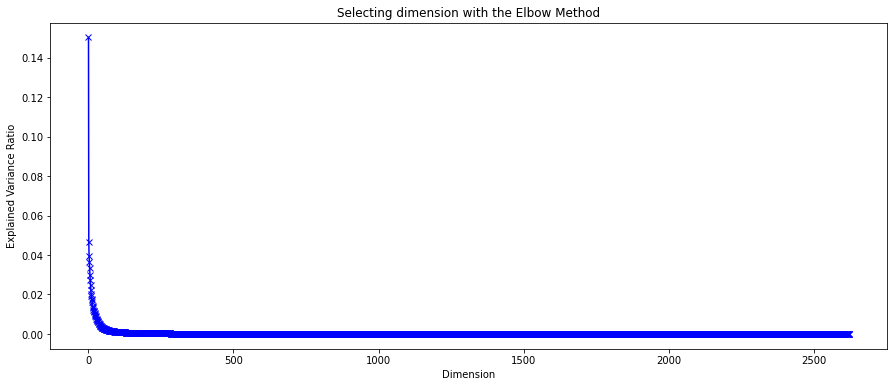

In [0]:
fig1 = plt.figure(figsize=(15,6))
plt.plot(list(range(1,(features+1))), pca.explained_variance_ratio_, 'bx-')
plt.xlabel('Dimension')
plt.ylabel('Explained Variance Ratio')
plt.title('Selecting dimension with the Elbow Method')

In [0]:
# Set variable for the decided dimension
final_n_component = 100
# Taking the attribute count as per the decision.
pca_component = PCA(n_components=final_n_component, svd_solver='full')
pca_component.fit(X_train_scaled)
print(f"Eigen Values (with {final_n_component} PCA components):")
print("===========================================")
print(pca_component.explained_variance_)
print(f"Eigen Vectors (with {final_n_component} PCA components):")
print("=================================================")
print(pca_component.components_)
print(f"The percentage of variation explained by each eigen Vector (with {final_n_component} PCA components):")
print("==========================================================================================")
print(pca_component.explained_variance_ratio_)
# Transforming the dataset
pca_X_train = pca_component.transform(X_train_scaled)
pca_X_test = pca_component.transform(X_test_scaled)
pca_X_train

Eigen Values (with 100 PCA components):
[356.33836552 141.55023127 104.63868662  96.63277552  89.17777103
  82.0785248   67.95911747  61.23037863  55.13671904  50.94871356
  47.69229461  44.60711358  43.47557133  40.96230346  37.10142342
  35.75282793  34.19304034  32.19461589  30.29338663  29.75030613
  28.64960474  27.67529097  25.21025528  24.56349533  23.98668344
  23.15696868  21.86929475  20.14980447  19.94108241  19.3135565
  18.35399027  17.4259422   16.61154512  16.26908915  15.00313171
  14.03317244  13.87300548  13.42445877  13.26808886  12.65131419
  11.49760114  11.38657479  10.3440958   10.32410374   9.71005905
   9.34725364   8.93454203   8.77049181   8.61116922   8.38559487
   8.21231916   8.06700031   7.61600606   7.40900789   7.31879817
   7.16653526   7.0439759    6.85417348   6.65781719   6.51367574
   6.22166776   6.08034721   5.90251044   5.69221472   5.53040096
   5.3957099    5.25062135   5.10429132   4.92428573   4.84769265
   4.78777753   4.6944147    4.574217

array([[-14.02191443,  17.64131466, -12.7861542 , ...,   1.66990858,
         -0.66513379,  -1.38970605],
       [ -6.47600218,  17.21244944,  -9.36228386, ...,   1.30833244,
         -1.22308048,   0.18211542],
       [-17.99205103,   6.00968929,  -3.92098153, ...,   2.03180362,
          2.16114126,   0.63625314],
       ...,
       [ 20.79843095, -21.41436155, -18.10902354, ...,  -0.63679675,
         -1.33534814,  -1.59517883],
       [ 16.92134194, -21.70845073, -12.85736427, ...,  -0.24192609,
          0.82955633,   0.49421117],
       [ 38.17948809, -18.27692039,   2.93363154, ...,  -3.5953354 ,
          1.94717981,  -1.00374859]])

### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [0]:
from sklearn.svm import SVC

In [0]:
pca_svm = SVC(C = 0.01, kernel = 'linear', gamma= "scale")

In [0]:
pca_svm.fit(pca_X_train, y_train)

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
pca_svm.score(pca_X_test, y_test)

0.949874686716792

### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

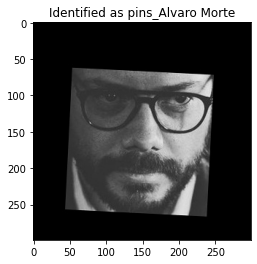

In [0]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = pca_svm.predict([pca_X_test[example_idx]])
#### Add your code here ####
example_identity = label_encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

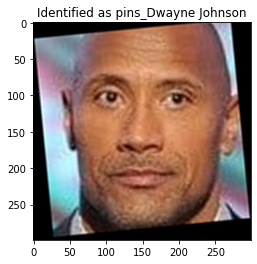

In [0]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 229

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = pca_svm.predict([pca_X_test[example_idx]])
#### Add your code here ####
example_identity = label_encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');